# Data Preprocessing

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("spam.tsv", sep='\t')

In [4]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [5]:
df.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [6]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [7]:
# check number of ham and spam
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

# Balancing the data

In [8]:
# select ham data
ham = df[df['label']=='ham']
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [9]:
# select spam data
spam = df[df['label']=='spam']
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [10]:
# check the shape of data
ham.shape, spam.shape

((4825, 4), (747, 4))

In [11]:
ham = ham.sample(spam.shape[0])

In [12]:
ham.shape

(747, 4)

In [20]:
# append spam data into ham data
data = pd.concat([ham, spam], ignore_index=True)
data['label'].value_counts(), data.shape

(label
 ham     747
 spam    747
 Name: count, dtype: int64,
 (1494, 4))

# Data Visualization

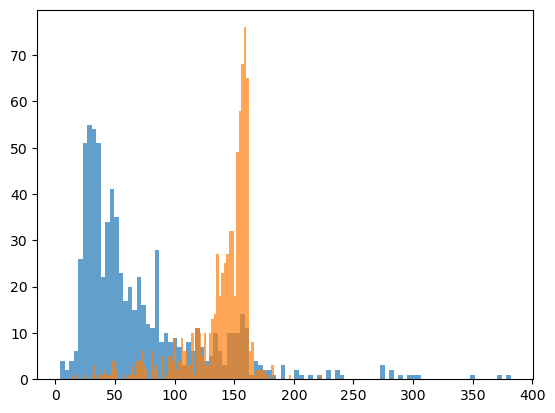

In [24]:
# plot histogram of length for ham messages
plt.hist(data[data['label']=='ham']['length'], bins=100, alpha=0.7)
plt.hist(data[data['label']=='spam']['length'], bins=100, alpha=0.7)
plt.show()
# from the histogram we can say that, the number of charactors in ham messages are less than 100

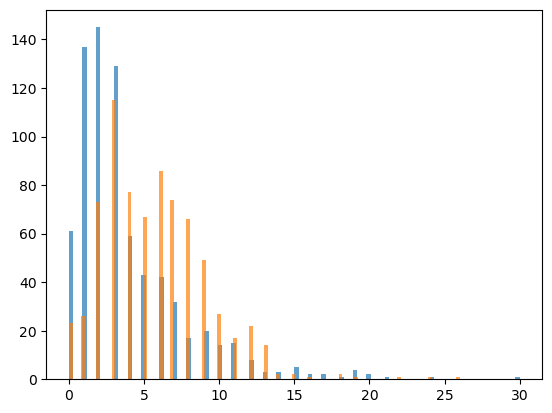

In [25]:
# plot histogram of punct for ham and spam both
plt.hist(data[data['label']=='ham']['punct'], bins=100, alpha=0.7)
plt.hist(data[data['label']=='spam']['punct'], bins=100, alpha=0.7)
plt.show()

# Split the data into train & test sets

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train, x_test, y_train, y_test = train_test_split(data['message'],data['label'],test_size=0.3,
                                                    random_state=0, shuffle=True)

In [28]:
x_train

1438      You have 1 new message. Please call 08715205273
431                         Dont kick coco when he's down
194                Have you been practising your curtsey?
240     Beautiful Truth against Gravity.. Read careful...
1309    Had your mobile 11 months or more? U R entitle...
                              ...                        
763     Your free ringtone is waiting to be collected....
835     XCLUSIVE@CLUBSAISAI 2MOROW 28/5 SOIREE SPECIAL...
1216    Dorothy@kiefer.com (Bank of Granite issues Str...
559     Realy sorry-i don't recognise this number and ...
684     Yes princess! I want to please you every night...
Name: message, Length: 1045, dtype: object

In [29]:
y_train

1438    spam
431      ham
194      ham
240      ham
1309    spam
        ... 
763     spam
835     spam
1216    spam
559      ham
684      ham
Name: label, Length: 1045, dtype: object

# Building Model - Random Forest

In [30]:
from sklearn.pipeline import Pipeline
# there will be lot of repeated processes for training and testing the dataset separately,
# to avoid that we are using pipeline

from sklearn.feature_extraction.text import TfidfVectorizer
# we are importing TfidfVectorizer to utilize bag of words model in sklearn

from sklearn.ensemble import RandomForestClassifier

In [31]:
classifier = Pipeline([('tfidf', TfidfVectorizer()), ('classifier',RandomForestClassifier(n_estimators=100))])

In [32]:
classifier.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

# Predicting the result

In [33]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [34]:
y_pred = classifier.predict(x_test)

In [35]:
# confusion_matrix
confusion_matrix(y_test, y_pred)

array([[227,   0],
       [ 25, 197]], dtype=int64)

In [36]:
# classification_report
print(classification_report(y_test, y_pred))
# we are getting almost 95% accuracy

              precision    recall  f1-score   support

         ham       0.90      1.00      0.95       227
        spam       1.00      0.89      0.94       222

    accuracy                           0.94       449
   macro avg       0.95      0.94      0.94       449
weighted avg       0.95      0.94      0.94       449



In [37]:
accuracy_score(y_test, y_pred)
# 94.5% accuracy

0.9443207126948775

In [38]:
# Predict a real message
classifier.predict(['Hello, You are learning atural Language Processing'])

array(['ham'], dtype=object)

In [39]:
classifier.predict(['Hope you are doing good and learning new things !'])

array(['ham'], dtype=object)

In [40]:
classifier.predict(['Congratulations, You won a lottery ticket worth $1 Million ! To claim call on 446677'])

array(['spam'], dtype=object)

# Building the model - Support Vector Machine

In [41]:
from sklearn.svm import SVC

In [42]:
classifier = Pipeline([('tfidf', TfidfVectorizer()), ('classifier',SVC(C=100,gamma='auto'))])

In [43]:
classifier.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto'))])

# Predicting the results (SVM)

In [44]:
y_pred = classifier.predict(x_test)

In [45]:
# confusion_matrix
confusion_matrix(y_test, y_pred)

array([[224,   3],
       [ 18, 204]], dtype=int64)

In [46]:
accuracy_score(y_test, y_pred)

0.9532293986636972

In [47]:
# Predict a real message
classifier.predict(['Hello, You are learning atural Language Processing'])

array(['ham'], dtype=object)

In [48]:
classifier.predict(['Hope you are doing good and learning new things !'])

array(['ham'], dtype=object)

In [49]:
classifier.predict(['Congratulations, You won a lottery ticket worth $1 Million ! To claim call on 446677'])

array(['spam'], dtype=object)